# Give Me Some Credit - Overview

## Problem Statement

From the Competition:
    
```
This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.
```


We're given a dataset that has already been split between a Training and Testing set. The dataset contains the following columns:

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age**	Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

// describe how the submission is supposed to look like and how it is evaluated

# Give Me Some Credit - Model

## Examining the Training Set


In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [248]:
train = pd.read_csv('./data/cs-training.csv')

In [249]:
train.isnull().any()

Unnamed: 0                              False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

There are two columns with missing data, 'MonthlyIncome' and 'NumberOfDependents'. We will omit these when training our predictor.

## Train Model Omitting The Two Features With Missing Data

In [250]:
X_train = train.drop(['Unnamed: 0','SeriousDlqin2yrs', 'MonthlyIncome', 'NumberOfDependents'],axis=1)
y_train = train['SeriousDlqin2yrs'].values

In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


regressor = LogisticRegression(solver='newton-cg')
regressor.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

## Running On Testing Set and Saving Probabilities to CSV


In [252]:
test = pd.read_csv('./data/cs-test.csv')
test = test.drop(['Unnamed: 0','SeriousDlqin2yrs', 'MonthlyIncome', 'NumberOfDependents'],axis=1)

In [253]:
y_test = regressor.predict_proba(test)

In [254]:
import csv

with open('entry.csv', mode='w') as entry_file:
    entry_writer = csv.writer(entry_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    entry_writer.writerow(['Id', 'Probability'])
    for i in range(0, len(y_test)):
        entry_writer.writerow([str(i+1), y_test[i][1]])

## Evaluating on Kaggle

The exported CSV with the probabilities was then submitted to the Kaggle Competition by using the Kaggle CLI

```
kaggle competitions submit -c GiveMeSomeCredit -f entry.csv -m "Logistic Regression: Newtons"
```

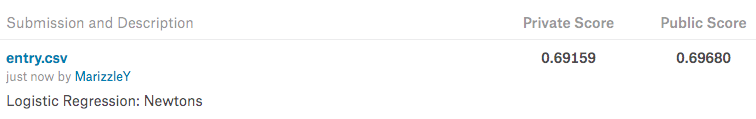

In [259]:
from IPython.display import Image
Image(filename='./images/KaggleSubmission_LogisticRegression.png') 
